## Importing libraries

In [1]:
# Import TensorFlow and hub
import tensorflow as tf
import tensorflow_hub as hub

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# some important packages
import os
import re
import pandas as pd
import numpy as np

# scikit-learn
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

## Loading the dataset

In [3]:
df = pd.read_csv("/Users/himanshukumarsingh/Downloads/MSc clg stuffs/Sem 2/project/ml project/Top_10000_Movies.csv", engine = 'python')
df.head()

,Unnamed: 0,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,0,580489.0,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736.0,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000.0,97.0,NaN
1,1,524434.0,en,Eternals,3365.535,2021-11-03,7.1,622.0,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000.0,157.0,In the beginning...
2,2,438631.0,en,Dune,2911.423,2021-09-15,8.0,3632.0,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356.0,155.0,"Beyond fear, destiny awaits."
3,3,796499.0,en,Army of Thieves,2552.437,2021-10-27,6.9,555.0,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0.0,127.0,"Before Vegas, one locksmith became a legend."
4,4,550988.0,en,Free Guy,1850.470,2021-08-11,7.8,3493.0,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766.0,115.0,Life's too short to be a background character.


#

### creating a test_data dictionary to evaluate model's performance(detailed explanation of this test_data is given after model building process)

In [73]:
test_data = {}
for i in ['Drama','Comedy','Action']:
    test_data[i] = []
    j = 0
    while len(test_data[i]) != 10 and j<500:
        if i in df['genre'][j]:
            test_data[i].append(df['original_title'][j])
        j += 1
                
test_data

{'Drama': ['W jak morderstwo',
  'After We Fell',
  'Kin',
  'Hypnotic',
  'The Many Saints of Newark',
  'Narco Sub',
  'Finch',
  'Ava',
  '機動戦士ガンダム 閃光のハサウェイ',
  'SAS: Red Notice'],
 'Comedy': ['Free Guy',
  'The Addams Family 2',
  'I onde dager',
  'Peçanha Contra o Animal',
  'Последний богатырь: Корень зла',
  'W jak morderstwo',
  'The Boss Baby: Family Business',
  'Matando Cabos 2: La Máscara del Máscara',
  'Jungle Cruise',
  'Luca'],
 'Action': ['Venom: Let There Be Carnage',
  'Eternals',
  'Dune',
  'Army of Thieves',
  'Free Guy',
  'Gunpowder Milkshake',
  'Venom',
  'American Badger',
  '劇場版 七つの大罪 光に呪われし者たち',
  'Shang-Chi and the Legend of the Ten Rings']}

#

# EXPLORATORY DATA ANALYSIS

#

In [12]:
# checking the basic statistical summary of numerical columns of the movie dataset
summary_column = df[['popularity','revenue','runtime']]
summary_column.describe()

,popularity,revenue,runtime
count,10000.000000,9.998000e+03,9989.000000
mean,34.516871,5.737536e+07,98.792772
std,100.693958,1.480897e+08,28.771525
min,6.269000,0.000000e+00,0.000000
25%,11.908000,0.000000e+00,89.000000
50%,17.488000,5.931240e+05,99.000000
75%,29.626250,4.768796e+07,113.000000
max,5401.308000,2.847246e+09,400.000000


## Genere is present in the form of string so we have to first convert them into list to do any further analysis

In [44]:
# creating a dictionary to keep the records of genre count
genre_count = {}

for h in df['genre']:
    if h is not None:
        i = eval(h)
        for j in i:
            if j in genre_count:
                genre_count[j] = genre_count[j] + 1
            
            else:
                genre_count[j] = 1
                
    else:
        continue

## Visually representing the popular genres

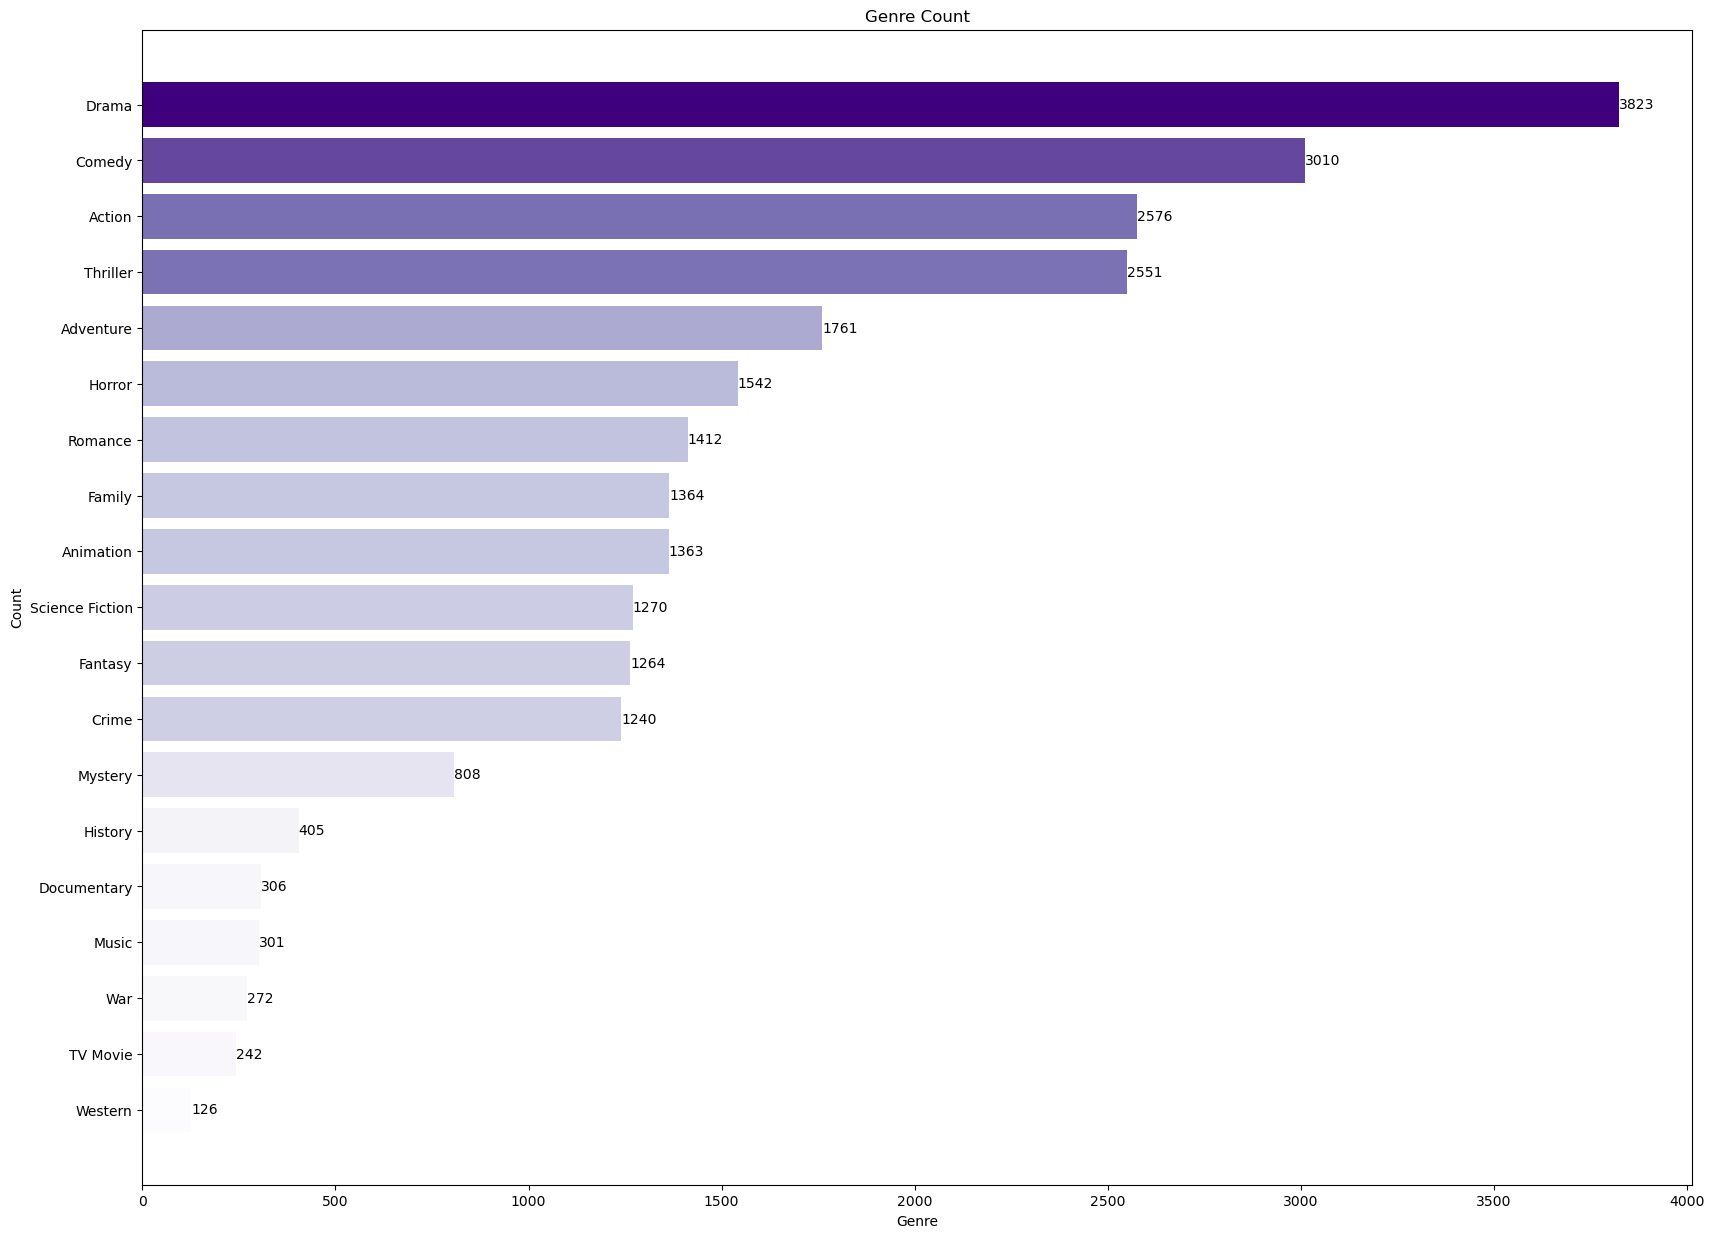

In [45]:
# plotting frequency ploygon(bar graph) for each genre

genre = list(genre_count.keys())
count = list(genre_count.values())

# Sort the genres based on their values
sorted_genre = [x for _, x in sorted(zip(count, genre))]
sorted_value = sorted(count)

# Define a color map ranging from light purple to dark purple
cmap = plt.get_cmap('Purples')

# Normalize values for color intensity
norm = plt.Normalize(min(sorted_value), max(sorted_value))

# Create the bar plot
plt.figure(figsize=(20,15))
bars = plt.barh(sorted_genre, sorted_value, color=[cmap(norm(value)) for value in sorted_value])

# Add count values on top of the bars
for bar, value in zip(bars, sorted_value):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, value, ha='left', va='center')

plt.title('Genre Count')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

## Conclusion from the bar graph:
## The above graph is clearly showing the distribution of popularity of different genres. "Drama" is the most frequent genre while "Western" is the least. 

#

## Checking the popularity of movies on the basis of language


In [6]:
df['original_language'].value_counts()

original_language
en    7798
ja     609
es     417
fr     293
ko     140
it     104
zh     103
cn      79
de      78
ru      69
pt      55
hi      30
da      30
no      24
sv      22
pl      19
nl      19
id      15
th      15
tr      10
he       9
cs       6
fi       6
fa       5
uk       5
hu       4
sr       4
lv       3
te       3
el       3
tl       3
eu       2
is       2
ta       2
ro       2
ka       1
ml       1
sk       1
ga       1
be       1
bn       1
0        1
ms       1
la       1
nb       1
6        1
ar       1
ca       1
ur       1
Name: count, dtype: int64

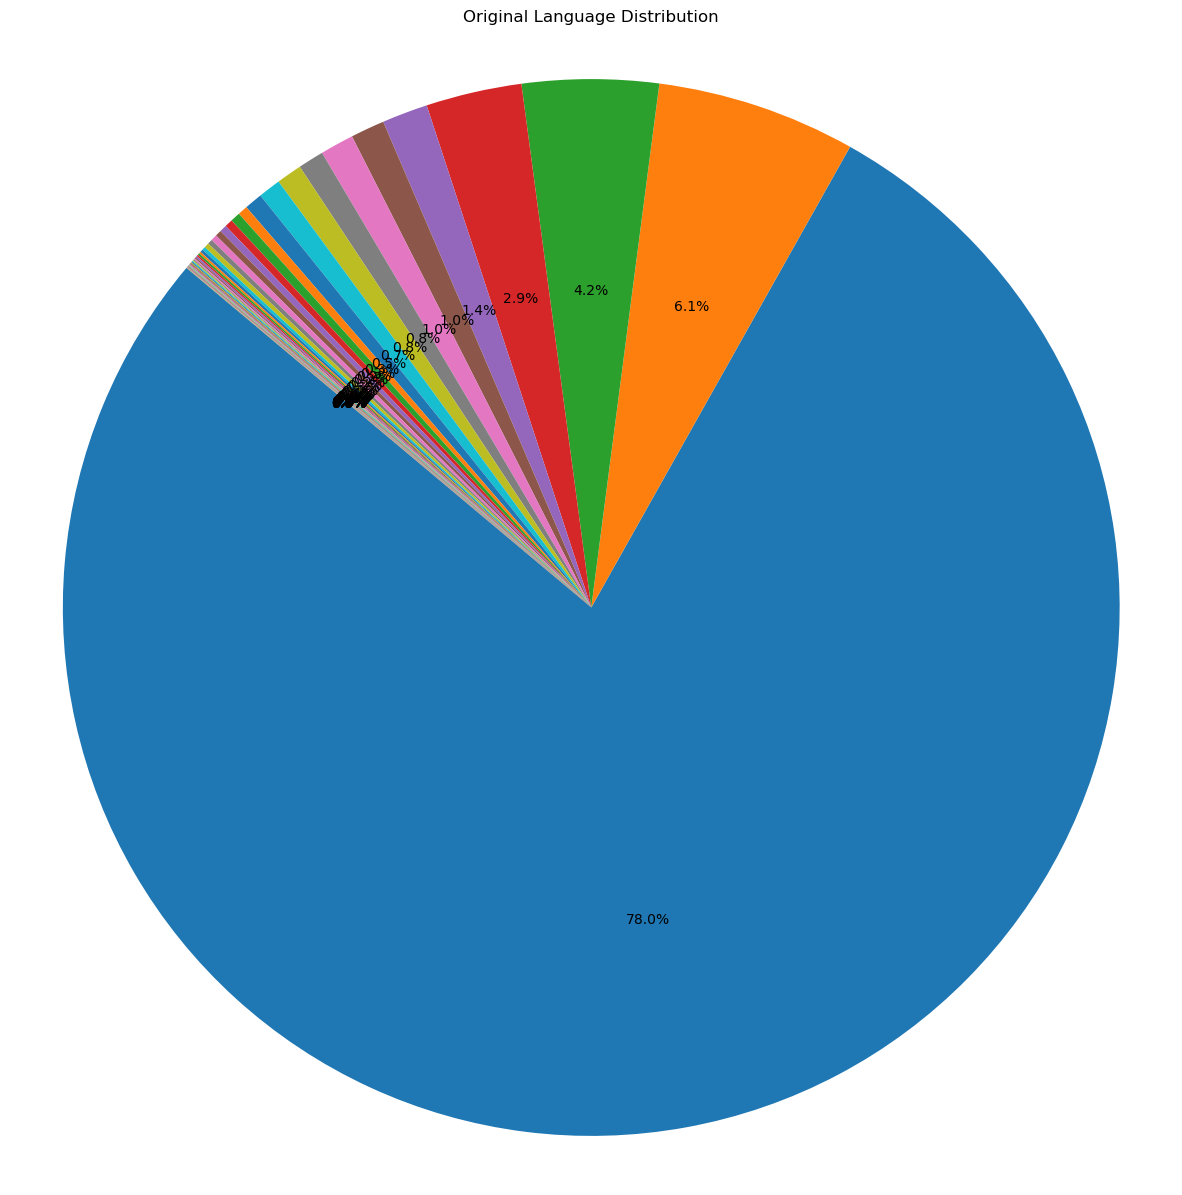

In [7]:
language_counts = df['original_language'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(15, 15))
plt.pie(language_counts, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Original Language Distribution')
plt.show()

## Analysing the relationship between the numerical columns

In [8]:
df.describe()

,id,popularity,vote_average,vote_count,revenue,runtime
count,10002.000000,10000.000000,10000.00000,10000.000000,9.998000e+03,9989.000000
mean,250003.082683,34.516871,6.29875,1315.084900,5.737536e+07,98.792772
std,261732.329571,100.693958,1.43426,2501.899103,1.480897e+08,28.771525
min,0.000000,6.269000,0.00000,0.000000,0.000000e+00,0.000000
25%,11864.500000,11.908000,5.90000,118.000000,0.000000e+00,89.000000
50%,144312.000000,17.488000,6.50000,425.500000,5.931240e+05,99.000000
75%,451406.000000,29.626250,7.10000,1297.250000,4.768796e+07,113.000000
max,893478.000000,5401.308000,9.50000,30184.000000,2.847246e+09,400.000000


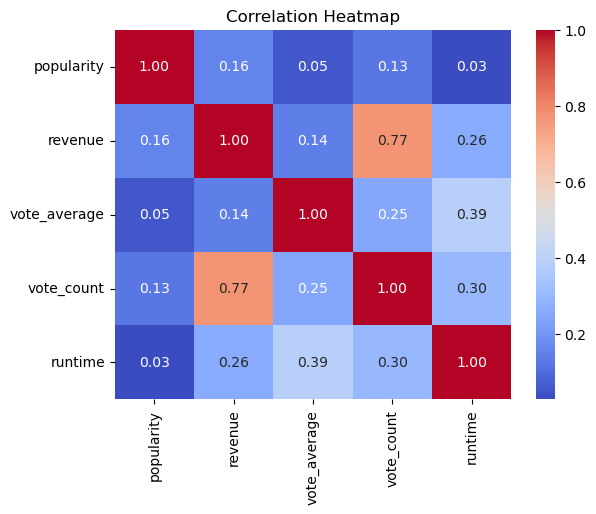

In [9]:
# calculating the correlation matrix

df_corr = df[['popularity','revenue','vote_average','vote_count','runtime']]
correlation_matrix = df_corr.corr()

# Plotting the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#

#

# DATA PREPROCESSING

#

## Data Reduction

In [4]:
df = df[['genre','original_title','overview','original_language']]
print(df.shape)
df.head()

(10014, 4)


,genre,original_title,overview,original_language
0,"['Science Fiction', 'Action', 'Adventure']",Venom: Let There Be Carnage,After finding a host body in investigative rep...,en
1,"['Action', 'Adventure', 'Science Fiction', 'Fa...",Eternals,The Eternals are a team of ancient aliens who ...,en
2,"['Action', 'Adventure', 'Science Fiction']",Dune,"Paul Atreides, a brilliant and gifted young ma...",en
3,"['Action', 'Crime', 'Thriller']",Army of Thieves,A mysterious woman recruits bank teller Ludwig...,en
4,"['Comedy', 'Action', 'Adventure', 'Science Fic...",Free Guy,A bank teller called Guy realizes he is a back...,en


### here we have chosen the features of data that are most important in our recommendation system

## Data Cleaning

In [5]:
df = df.dropna()

print(df.shape)
df.head()

(9900, 4)


,genre,original_title,overview,original_language
0,"['Science Fiction', 'Action', 'Adventure']",Venom: Let There Be Carnage,After finding a host body in investigative rep...,en
1,"['Action', 'Adventure', 'Science Fiction', 'Fa...",Eternals,The Eternals are a team of ancient aliens who ...,en
2,"['Action', 'Adventure', 'Science Fiction']",Dune,"Paul Atreides, a brilliant and gifted young ma...",en
3,"['Action', 'Crime', 'Thriller']",Army of Thieves,A mysterious woman recruits bank teller Ludwig...,en
4,"['Comedy', 'Action', 'Adventure', 'Science Fic...",Free Guy,A bank teller called Guy realizes he is a back...,en


### here, in null-value treatment, we are only left with the option of dropping the null values as the null values of categorical columns cannot be replaced by any other values( for example, the null value in overview column cannot be replaced by the overview of any other movie as overview of every movie is unique)

#

# LOAD universal sentence encoder using TensorFlow hub


In [6]:
model_path = "/Users/himanshukumarsingh/Downloads/MSc clg stuffs/Sem 2/project/archive"
model = hub.load(model_path)
print("Model loaded")

Model loaded


In [7]:
# this function outputs the embedding for the given text
def embed(texts):
    return model(texts)

In [15]:
# checking the output of embed function
embed(["This movie was great"])

<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[ 0.00549278,  0.02886906, -0.02628895,  0.04502156, -0.01233335,
         0.0256833 , -0.00071883, -0.05447303,  0.04221928, -0.0191371 ,
         0.02710012, -0.04328045, -0.02486859,  0.0135952 ,  0.00482792,
        -0.05379639,  0.01630707,  0.02139908,  0.02644026, -0.02320252,
         0.0656922 , -0.10137627, -0.01691998,  0.02492482,  0.02406814,
        -0.03139618, -0.03265485, -0.05174927, -0.0727149 ,  0.10145196,
         0.03868444,  0.0438069 , -0.02071748, -0.01873295, -0.0307144 ,
         0.01825574,  0.03627162,  0.01321463,  0.00943488, -0.03006627,
         0.06655686,  0.01529936, -0.10101433, -0.00671942, -0.01578641,
         0.04991001,  0.02548565,  0.05454975, -0.01658572,  0.05624886,
         0.03834499, -0.08679942, -0.06096426, -0.01161775,  0.0199745 ,
         0.04206814, -0.04119826, -0.00768588, -0.05101158,  0.01210049,
        -0.01673211, -0.01382073,  0.00373704,  0.04911596, -0.03481685,
 

In [8]:
overviews = list(df['overview'])
titles = list(df['original_title'])
languages = list(df['original_language'])

In [9]:
# generating embeddings for all the overviews
embeddings_1 = embed(overviews)
print('The embedding shape is:', embeddings_1.shape)

The embedding shape is: (9900, 512)


In [10]:
# generating embeddings for all the titles
embeddings_2 = embed(titles)
print('The embedding shape is:', embeddings_2.shape)

The embedding shape is: (9900, 512)


In [11]:
# generating embeddings for all the languages
embeddings_3 = embed(languages)
print('The embedding shape is:', embeddings_3.shape)

The embedding shape is: (9900, 512)


#

# Model Building

In [12]:
# creating nearest neighbour for overviews
nn_1 = NearestNeighbors(n_neighbors=10)
nn_1.fit(embeddings_1)

NearestNeighbors(n_neighbors=10)

In [13]:
# creating nearest neighbour for titles
nn_2 = NearestNeighbors(n_neighbors=10)
nn_2.fit(embeddings_2)

NearestNeighbors(n_neighbors=10)

In [14]:
# creating nearest neighbour for languages
nn_3 = NearestNeighbors(n_neighbors=10)
nn_3.fit(embeddings_3)

NearestNeighbors(n_neighbors=10)

### The 'test_data' dictionary can be used to evaluate the model's performance. 'test_data' dictionary has the key values in the form of three different genres namely 'Drama','Comedy' & 'Action' and each key is paired with values in the form of 10 movies following the corresponding genre.

In [67]:
test_data

{'Drama': ['W jak morderstwo',
  'After We Fell',
  'Kin',
  'Hypnotic',
  'The Many Saints of Newark',
  'Narco Sub',
  'Finch',
  'Ava',
  '機動戦士ガンダム 閃光のハサウェイ',
  'SAS: Red Notice'],
 'Comedy': ['Free Guy',
  'The Addams Family 2',
  'I onde dager',
  'Peçanha Contra o Animal',
  'Последний богатырь: Корень зла',
  'W jak morderstwo',
  'The Boss Baby: Family Business',
  'Matando Cabos 2: La Máscara del Máscara',
  'Jungle Cruise',
  'Luca'],
 'Action': ['Venom: Let There Be Carnage',
  'Eternals',
  'Dune',
  'Army of Thieves',
  'Free Guy',
  'Gunpowder Milkshake',
  'Venom',
  'American Badger',
  '劇場版 七つの大罪 光に呪われし者たち',
  'Shang-Chi and the Legend of the Ten Rings']}

In [154]:
# converting first 10 rows of genre column ,present in string form ,to list form
genre_list = []
for i in range(10):
    genre_list.append(data['genre'][i])
    
embeddings = embed(genre_list)
print('The embedding shape is:', embeddings.shape)

The embedding shape is: (10, 512)


In [155]:
# creating nearest neighbour for first 10 overviews
nn = NearestNeighbors(n_neighbors=10)
nn.fit(embeddings)

NearestNeighbors(n_neighbors=10)

In [164]:
# function to evaluate the recommendation system:

def evaluate_recommendation_system(test_data):
    correct_recommendation = 0
    total_recommendation = 0
    
    # function to obtain the recommendation on the basis of genre: 
    def recommend_movies(genre):
        emb = embed([genre])
        neighbors = nn.kneighbors(emb, return_distance=False)[0]
        return df['original_title'].iloc[neighbors].tolist()
        
    # function to get predicted movies:
    for genre, expected_recommendation in test_data.items():
        predicted_titles = recommend_movies(genre)
        
        # check how many of the predicted titles are in the expected recommendations
        for movie in predicted_titles:
            if movie in expected_recommendation:
                correct_recommendation += 1
                
        total_recommendation += len(predicted_titles)
        
    accuracy = correct_recommendation / total_recommendation
    return accuracy

accuracy = evaluate_recommendation_system(test_data)
print('Accuracy of the recommendation system is ',accuracy)
    

Accuracy of the recommendation system is  0.3


### We got an accuracy of 0.3 which is very low. But it is not because of that our model is performing bad, its because of the scaling of the dataset. We choose only 10 movies serialwise from the original dataset to make the test_data but it doesnt mean that only those 10 movies follow that particular genere. And its not recommended to include the whole dataset in test_set. So we have to fetch some other way to check the accuracy of the model.

In [19]:
# creating a function to give output on the basis of user choice

def recommend(choice,text):
    emb = embed([text])
    if choice == 1:
        neighbors = nn_1.kneighbors(emb, return_distance=False)[0]
        print('\nHere are the movies according to your choice')
        return df['original_title'].iloc[neighbors].tolist()
    
    elif choice == 2:
        neighbors = nn_2.kneighbors(emb, return_distance=False)[0]
        print('\nHere are the movies according to your choice')
        return df['original_title'].iloc[neighbors].tolist()
    
    elif choice == 3:
        neighbors = nn_3.kneighbors(emb, return_distance=False)[0]
        print('\nHere are the movies according to your choice')
        return df['original_title'].iloc[neighbors].tolist()

In [16]:
# using pickle library to save/dump the model:

import pickle

# Save the recommend function and its associated models
def save_recommend_function(recommend_function, models_dict, filename):
    with open(filename, 'wb') as f:
        pickle.dump((recommend_function, models_dict), f)

# save the recommend function and models
models = {'nn_1': nn_1, 'nn_2': nn_2, 'nn_3': nn_3}
save_recommend_function(recommend, models, 'recommendation_model.pkl')

In [1]:
# Load the recommend function and its associated models
import pickle

def load_recommend_function(filename):
    with open(filename, 'rb') as f:
        recommend_function, models_dict = pickle.load(f)
    return recommend_function, models_dict

# load the recommend function and models
recommend_loaded, models_loaded = load_recommend_function('recommendation_model.pkl')

AttributeError: Can't get attribute 'recommend' on <module '__main__'>

In [21]:
# taking user input
print('On what basis do you want me to recommend the movie?')
print('Choose 1 for genre/keyword')
print('Choose 2 for some movie title')
print('Choose 3 for language\n')
choice = int(input())

if choice == 1:
    text = input('\nEnter your genre/keyword: ')
    
elif choice == 2:
    text = input('\nEnter any movie title: ')
    
elif choice == 3:
    text = input('\nEnter any language(only first 2 letters): ')
    
else:
    print('\nWrong input')
        
recommended_movies = recommend_loaded(choice, text)
print(recommended_movies)

On what basis do you want me to recommend the movie?
Choose 1 for genre/keyword
Choose 2 for some movie title
Choose 3 for language


Here are the movies according to your choice
['Thor', 'Thor: Ragnarok', 'Thor: The Dark World', 'Thor: Love and Thunder', 'Hulk vs. Thor', 'The Avengers', 'The Avengers', 'Avengers Grimm', "Marvel One-Shot: A Funny Thing Happened on the Way to Thor's Hammer", 'Hercules']


In [22]:
# function to determine the accuracy of result
def accuracy(text):
    overview_list = []
    for name in recommended_movies:
        data = df[df['original_title'] == name]
        overview_list.append(data['overview'].values)
    
    embeded_overview = []
    for i in overview_list:
        embeded_overview.append(embed(i))
    
    embed_text = embed([text])
    similarity = 0
    
    for i in embeded_overview:
        similarity = similarity + cosine_similarity(i,embed_text)[0][0]
        
    similarity = similarity/len(embeded_overview)
    
    return similarity
 
    
accuracy(text)

0.34824307858943937